<h2>Ramdom signal</h2>
Creating a random walk, Wiener process with normally distributed noise

In [1]:
import numpy as np
import numpy.random as nrp
import matplotlib.pyplot as plt

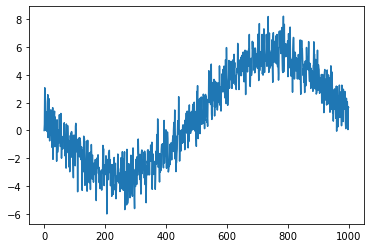

In [6]:
nn=1000
t=np.linspace(-np.pi, np.pi, nn)
xx = nrp.normal(1,size=nn) + 4.*np.sin(t)

x = np.array([0.])
alpha = 0.1
for ww in xx:
    x = np.append(x,x[-1]*alpha + ww)
plt.plot(x)
plt.show()

0.7445421479836931


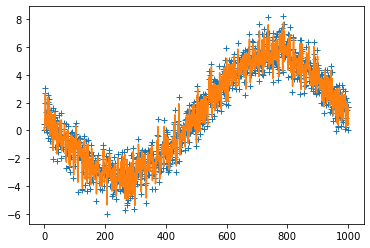

In [9]:
alpha=0.2
yy=np.array([alpha*x[1]])
for ww in x:
    yy = np.append(yy,alpha*yy[-1]+(1.-alpha)*ww)
plt.plot(x,'+')
plt.plot(yy)
print(np.std(yy[1:]-yy[:-1])/np.std(x[1:]-x[:-1]))
                   
    

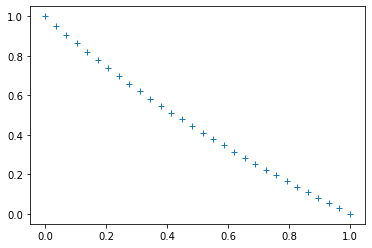

In [13]:
alpha=0.2
alphas = np.array([])
ratios = np.array([])
for alpha in np.linspace(0.0,1.0,30):
    yy=np.array([alpha*x[1]])
    for ww in x:
        yy = np.append(yy,alpha*yy[-1]+(1.-alpha)*ww)
    ratio = np.std(yy[1:]-yy[:-1])/np.std(x[1:]-x[:-1])
    ratios=np.append(ratios, ratio)
    alphas=np.append(alphas, alpha)
plt.plot(alphas,ratios,'+')
                   
    

In [46]:
t=np.linspace(0,2*np.pi,len(xx))

In [49]:
np.sin(t)


array([ 0.00000000e+00,  6.28943332e-03,  1.25786178e-02,  1.88673048e-02,
        2.51552454e-02,  3.14421909e-02,  3.77278927e-02,  4.40121020e-02,
        5.02945704e-02,  5.65750492e-02,  6.28532900e-02,  6.91290446e-02,
        7.54020646e-02,  8.16721019e-02,  8.79389084e-02,  9.42022363e-02,
        1.00461838e-01,  1.06717465e-01,  1.12968871e-01,  1.19215809e-01,
        1.25458030e-01,  1.31695289e-01,  1.37927338e-01,  1.44153931e-01,
        1.50374822e-01,  1.56589764e-01,  1.62798512e-01,  1.69000820e-01,
        1.75196443e-01,  1.81385136e-01,  1.87566653e-01,  1.93740751e-01,
        1.99907185e-01,  2.06065711e-01,  2.12216086e-01,  2.18358066e-01,
        2.24491409e-01,  2.30615871e-01,  2.36731210e-01,  2.42837185e-01,
        2.48933554e-01,  2.55020076e-01,  2.61096510e-01,  2.67162616e-01,
        2.73218154e-01,  2.79262883e-01,  2.85296566e-01,  2.91318963e-01,
        2.97329837e-01,  3.03328948e-01,  3.09316061e-01,  3.15290939e-01,
        3.21253344e-01,  

In [16]:
nn=1000
t=np.linspace(-1.0, 1.0, nn)
np.sign(t)*t**2.

array([-1.00000000e+00, -9.96000004e-01, -9.92008024e-01, -9.88024060e-01,
       -9.84048112e-01, -9.80080180e-01, -9.76120264e-01, -9.72168365e-01,
       -9.68224481e-01, -9.64288613e-01, -9.60360761e-01, -9.56440925e-01,
       -9.52529106e-01, -9.48625302e-01, -9.44729514e-01, -9.40841743e-01,
       -9.36961987e-01, -9.33090247e-01, -9.29226524e-01, -9.25370816e-01,
       -9.21523125e-01, -9.17683449e-01, -9.13851790e-01, -9.10028146e-01,
       -9.06212519e-01, -9.02404907e-01, -8.98605312e-01, -8.94813733e-01,
       -8.91030169e-01, -8.87254622e-01, -8.83487091e-01, -8.79727575e-01,
       -8.75976076e-01, -8.72232593e-01, -8.68497126e-01, -8.64769675e-01,
       -8.61050239e-01, -8.57338820e-01, -8.53635417e-01, -8.49940030e-01,
       -8.46252659e-01, -8.42573304e-01, -8.38901965e-01, -8.35238642e-01,
       -8.31583335e-01, -8.27936044e-01, -8.24296769e-01, -8.20665510e-01,
       -8.17042267e-01, -8.13427041e-01, -8.09819830e-01, -8.06220635e-01,
       -8.02629456e-01, -

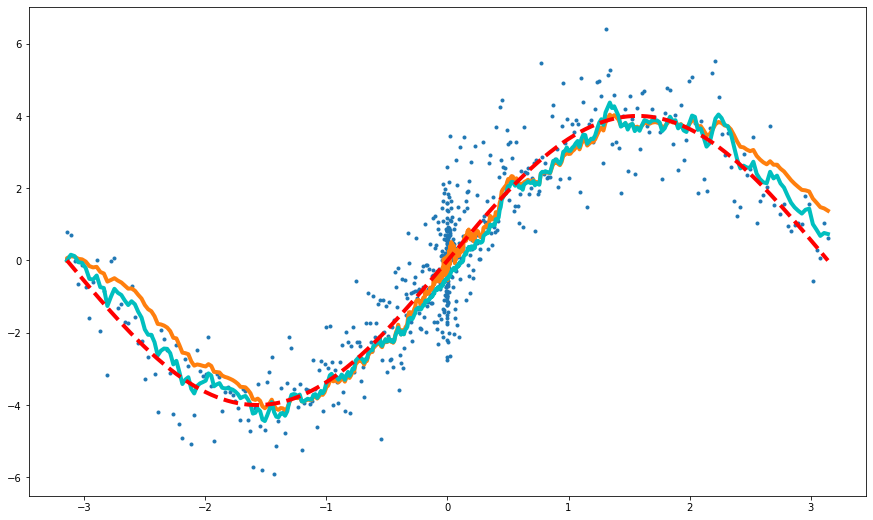

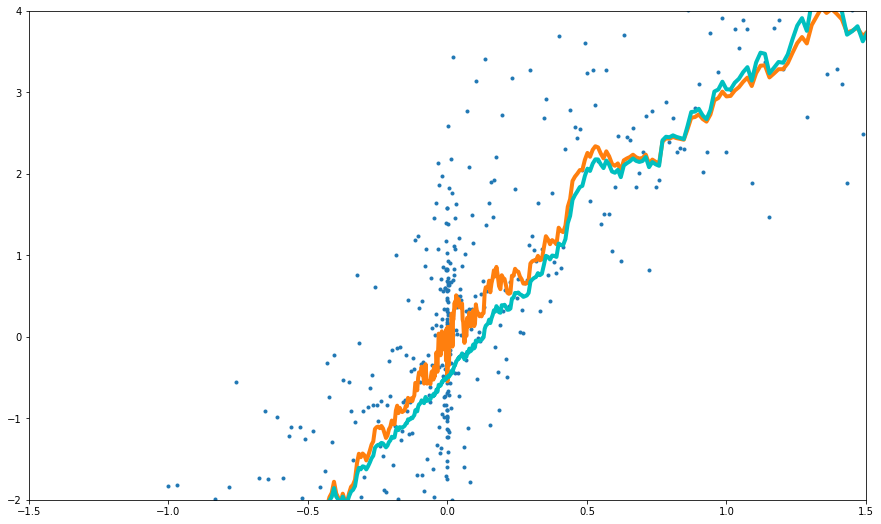

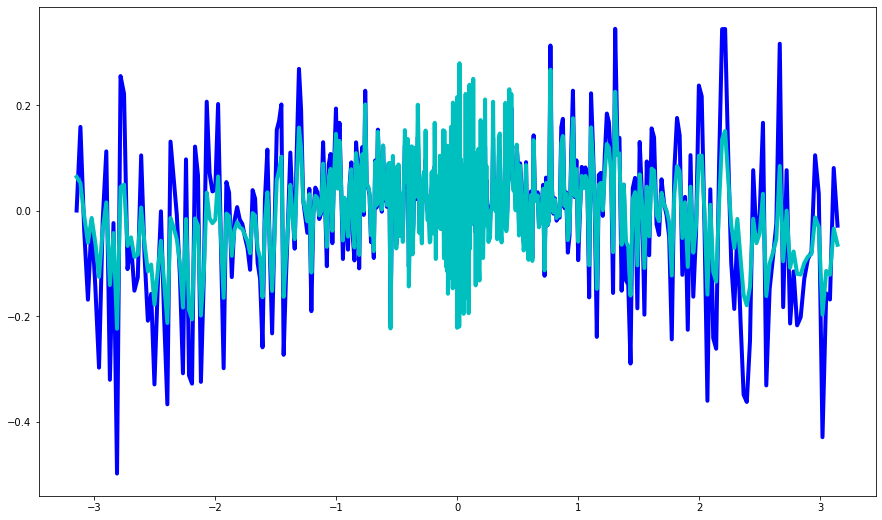

In [69]:
nn=600
avgdt = 2.*np.pi/(nn-1)
t=np.linspace(-1.0, 1.0, nn)
tr=np.pi*np.sign(t)*np.abs(t)**3.
xx = nrp.normal(0,1,size=nn) + 4.*np.sin(tr)
xx_clean = 4.*np.sin(tr)

alpha = 0.92

x1 = np.array([0.])
t1 = np.array([np.min(tr)])
for tt,ww in zip(tr,xx):
    x1 = np.append(x1,x1[-1]*alpha + ww*(1.-alpha))
    t1 = np.append(t1,tt)

x2 = np.array([0.])
t2 = np.array([np.min(tr)])
for tt,ww in zip(tr,xx):
    alpha_eff = alpha**((tt-t2[-1])/avgdt)
    x2 = np.append(x2,x2[-1]*alpha_eff + ww*(1.-alpha_eff))
    t2 = np.append(t2,tt)

plt.figure(figsize=(15,9))
plt.plot(tr,xx,'.',t1,x1,'-',t2,x2,'c-',tr,xx_clean,'r--',linewidth=4)
plt.show()

plt.figure(figsize=(15,9))
plt.plot(tr,xx,'.',t1,x1,'-',t2,x2,'c-',linewidth=4)
plt.xlim([-1.5,1.5])
plt.ylim([-2,4])
plt.show()

plt.figure(figsize=(15,9))
#plt.plot(tr,x1[1:]-x1[:-1],'y-',tr,x2[1:]-x2[:-1],'c-',linewidth=4)
plt.plot(tr,x2[1:]-x2[:-1],'b-',tr,x1[1:]-x1[:-1],'c-',linewidth=4)
plt.show()


(array([  5.,   9.,  32.,  76., 125., 147.,  99.,  59.,  40.,   8.]),
 array([-3.1472053 , -2.55586271, -1.96452011, -1.37317752, -0.78183492,
        -0.19049233,  0.40085027,  0.99219286,  1.58353546,  2.17487805,
         2.76622064]),
 <BarContainer object of 10 artists>)

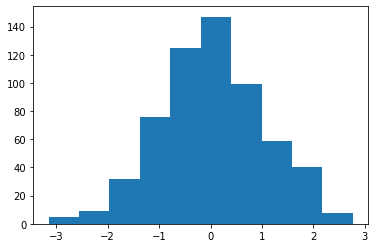

In [65]:
plt.hist(nrp.normal(0,1,size=nn))